In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [171]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [172]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data['Outcome']

In [173]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [174]:
test_scores = []
train_scores = []
for i in range(1,20):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)   
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

C:\Users\Chuxu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chuxu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


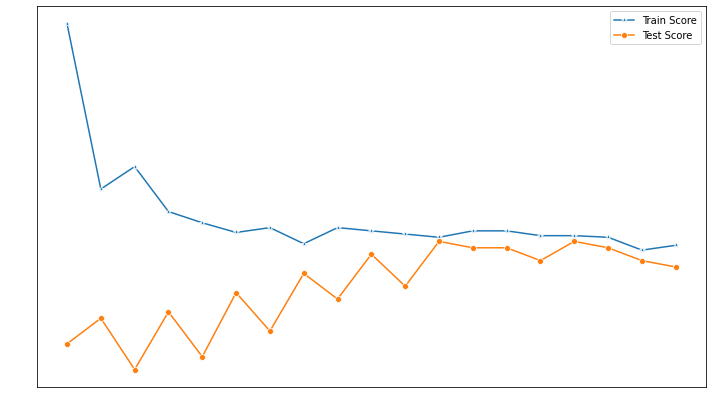

In [175]:
plt.figure(figsize=(12,7))
plt.tick_params(colors='white')
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [176]:
knn = KNeighborsClassifier(11)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7337662337662337

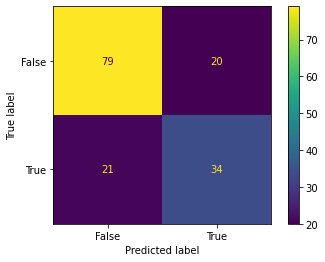

In [177]:
confusion_matrix = metrics.confusion_matrix(y_test,knn.predict(x_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()